# Poc 3

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
test = pd.read_csv('test_preprocessed.csv')
train = pd.read_csv('train_preprocessed.csv')

In [3]:
data = pd.concat([train,test],ignore_index=True)
data.drop(columns = 'voted',inplace = True)

In [4]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56907,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
56908,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
56909,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1
56910,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,1,0,0,1,1,0,1,1,1,0


- 질문 시간 데이터 이분화 0과 1 ( 0: 걸린 시간이 적다. 1: 걸린 시간이 크다)
- 순서형 데이터 나이를 순서형 데이터 age 컬럼과 명목형 age_group 컬럼으로 구분 

In [5]:
data['age'] = data['age_group'].map({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '+70s':70})

In [6]:
Qtime = data.iloc[:,1::2].iloc[:,:20]
Qtime.head()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


In [7]:
Qtimes = pd.DataFrame(np.where(Qtime>Qtime.median(),1,0),index = Qtime.index,columns = Qtime.columns)
data['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')] = Qtimes
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,0,1,1,0,1,0,1,1,30
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,0,1,1,0,1,0,1,1,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,0,1,1,1,1,0,1,1,30
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,0,1,0,1,0,1,1,20
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,1,0,1,1,1,1,20


### 마키아벨리즘 스코어 계산

In [8]:
Qaswer = data.iloc[:,::2].iloc[:,:20]
Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]] = 6 - Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]]
data['MachScore']=Qaswer.mean(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age,MachScore
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,30,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,20,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,30,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,20,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,20,3.00


### 답변시간 인덱스별로 합계

In [9]:
data['Qtsum'] = data.iloc[:,1::2].iloc[:,:20].sum(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age,MachScore,Qtsum
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,0,1,0,1,1,30,2.95,7
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,0,1,0,1,1,20,2.60,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1,0,1,1,30,1.90,17
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,1,0,1,0,1,1,20,3.35,16
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,0,1,1,1,1,20,3.00,7


In [10]:
# 연속형, 순서형 데이터
ordinal = ['familysize','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 
       'tp08', 'tp09', 'tp10','age','MachScore','education','Qtsum']

In [11]:
# 명목형 데이터
nominal = ['engnat','gender','hand','married','race','religion' ]

In [12]:
# 연속형 데이터 상관계수
coror = data[ordinal].corr(method ='spearman' )
coror

,familysize,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,age,MachScore,education,Qtsum
familysize,1.000000,-0.008677,0.064667,-0.052169,0.033347,-0.008389,0.000057,-0.053557,0.033927,-0.038173,-0.005233,0.118696,-0.111787,-0.014960,0.047139
tp01,-0.008677,1.000000,0.022816,0.107208,-0.118445,0.280564,-0.550784,0.223313,-0.036980,0.085378,-0.123476,-0.015579,0.099807,-0.044602,-0.062211
tp02,0.064667,0.022816,1.000000,-0.036698,0.143391,-0.002210,-0.023861,-0.282584,0.116595,-0.134510,0.011773,0.202844,-0.333765,0.099257,0.089935
tp03,-0.052169,0.107208,-0.036698,1.000000,-0.153295,0.108296,0.035262,0.091279,-0.415304,0.296143,-0.023482,-0.131337,0.074888,-0.117785,-0.038469
tp04,0.033347,-0.118445,0.143391,-0.153295,1.000000,-0.136709,0.126403,0.109121,0.199977,-0.525613,0.062912,0.103955,0.048917,0.072538,0.043952
tp05,-0.008389,0.280564,-0.002210,0.108296,-0.136709,1.000000,-0.133771,0.131986,0.023754,0.139076,-0.256283,-0.038686,-0.000641,-0.070060,-0.033312
tp06,0.000057,-0.550784,-0.023861,0.035262,0.126403,-0.133771,1.000000,-0.054278,0.037283,0.076686,0.138218,0.084494,-0.051129,0.056278,0.017053
tp07,-0.053557,0.223313,-0.282584,0.091279,0.109121,0.131986,-0.054278,1.000000,-0.019788,0.039261,-0.062176,-0.181436,0.447810,-0.102236,-0.156951
tp08,0.033927,-0.036980,0.116595,-0.415304,0.199977,0.023754,0.037283,-0.019788,1.000000,-0.217158,0.041658,0.182985,-0.100640,0.152326,0.092641
tp09,-0.038173,0.085378,-0.134510,0.296143,-0.525613,0.139076,0.076686,0.039261,-0.217158,1.000000,0.035138,-0.096358,0.017216,-0.097480,-0.070717


In [13]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

## 연속형 데이터 컬럼 간 그래프 

## 마키아벨리 스코어와 나이 간 그래프

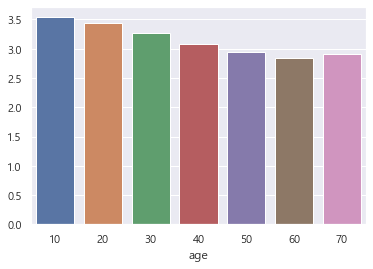

In [14]:
ms = data[['MachScore','age']].groupby('age')['MachScore'].mean()
sns.barplot(y =ms.values,x = ms.index)

- 나이가 많을 수록 마키아벨리즘 스코어가 낮아짐

## 마키아벨리 스코어와 시간 사이 그래프

Text(0.5, 0, 'MachScore')

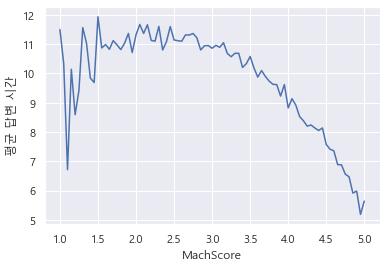

In [15]:
plt.plot(data[['MachScore','Qtsum']].groupby('MachScore')['Qtsum'].mean())
plt.ylabel('평균 답변 시간')
plt.xlabel('MachScore')

- 마키아 벨리즘 스코어는 높을 수록 평균 답변 시간이 짧아진다.

### 남성 중 손잡이에 따른 마키아벨리즘 스코어

Text(0.5, 0, "['1=Right', '2=Left', '3=Both']")

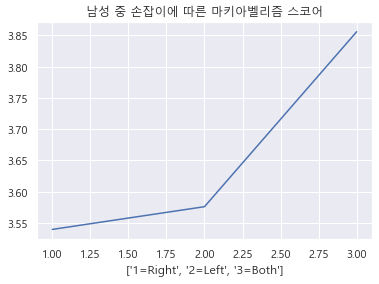

In [16]:
mg = data[['MachScore','gender', 'hand']].groupby(['gender', 'hand'])['MachScore'].mean()['Male']
plt.plot(mg)
plt.title('남성 중 손잡이에 따른 마키아벨리즘 스코어')
plt.xlabel(['1=Right', '2=Left', '3=Both'])

- 오른손 < 왼손 < 양손 순인 마키아벨리즘 스코어

### 모국어가 영어인 사람과 답변 시간 사이 관계

Text(0.5, 0, "['1=Yes', '2=No']")

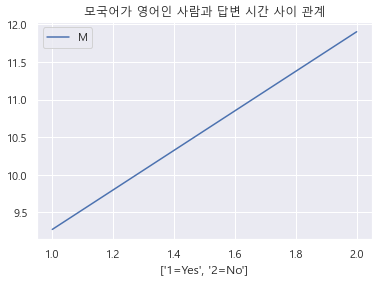

In [17]:
plt.plot(data[['engnat','Qtsum']].groupby('engnat')['Qtsum'].mean() )
plt.legend('MachScore')
plt.title('모국어가 영어인 사람과 답변 시간 사이 관계')
plt.xlabel(['1=Yes', '2=No'] )

- 모국어가 영어이면 답변 시간이 짧다.

### 어떤 손잡이인가에 따른 답변시간과의 관계

Text(0.5, 0, "['1=Right', '2=Left', '3=Both']")

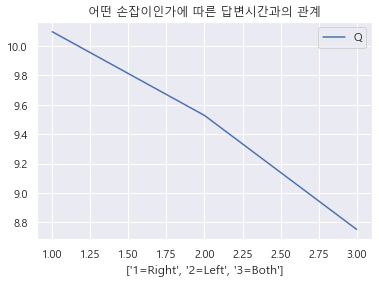

In [18]:
plt.plot(data[['Qtsum','hand']].groupby('hand')['Qtsum'].mean())
plt.legend('Qtsum')
plt.title('어떤 손잡이인가에 따른 답변시간과의 관계')
plt.xlabel(['1=Right', '2=Left', '3=Both'])

### 모국어가 영어인 사람과 아닌 사람의 손잡이에 따른 답변 시간

Text(0.5, 0, "['1=Right', '2=Left', '3=Both']")

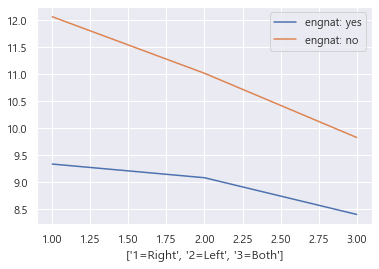

In [19]:
ehq = data[['engnat','hand','Qtsum']].groupby(['engnat','hand'])['Qtsum'].mean()
plt.plot(ehq[1])
plt.plot(ehq[2])
plt.legend(['engnat: yes','engnat: no'])
plt.xlabel(['1=Right', '2=Left', '3=Both'])

- 모국어가 영어인 사람이든 아니든 오른손 > 왼손 > 양손 순으로 답변 시간이 길었다.

## TIPI

In [20]:
## TIPI 점수 계산법 출처  https://gosling.psy.utexas.edu/scales-weve-developed/ten-item-personality-measure-tipi/
tpdata = data [['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10']]
tpdata.iloc[:,1::2] = 8 - tpdata.iloc[:,1::2] # 2,4,6,8,10 행 역점수
tpdata 

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,2,6,2,7,2,7,7,4,4,5
1,1,7,0,8,1,6,3,4,0,4
2,2,5,1,3,3,4,2,2,1,5
3,2,4,1,7,1,5,1,5,1,5
4,1,7,1,2,0,6,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...
56907,1,8,0,5,0,4,1,8,4,3
56908,2,8,2,8,0,2,0,8,6,4
56909,4,6,1,2,1,6,1,2,0,3
56910,4,2,1,2,0,6,1,2,1,3


In [21]:
# TIPI 점수에 따른 5가지 성향
chara =['Extroversion','Agreeableness' ,'Conscientiousness' ,'EmotionalStability', 'Openness']
for i in range(5):
    tpdata[chara[i]] = tpdata.iloc[:,[i,i+5]].mean(axis = 1)
tpdata.head()

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,Extroversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,2,6,2,7,2,7,7,4,4,5,4.5,6.5,3.0,5.5,3.5
1,1,7,0,8,1,6,3,4,0,4,3.5,5.0,2.0,4.0,2.5
2,2,5,1,3,3,4,2,2,1,5,3.0,3.5,1.5,2.0,4.0
3,2,4,1,7,1,5,1,5,1,5,3.5,2.5,3.0,4.0,3.0
4,1,7,1,2,0,6,0,2,2,2,3.5,3.5,1.5,2.0,1.0


In [22]:
## 성향의 범위를 나눈 출처 
# http://gosling.psy.utexas.edu/wp-content/uploads/2014/09/excelscoreTIPI.xls
#"Low","Medium Low","Medium High","High"
def charcategory(x,rang):
    categ = 0
    if x > rang[3]:
        categ = 4
    elif x > rang[2]:
        categ = 3
    elif x > rang[1]:
        categ = 2
    else:
        categ =1
    return categ

tpdata.Extroversion = tpdata.Extroversion.map(lambda x :charcategory(x,[0,2.99,4.44,5.89]))
tpdata.Agreeableness = tpdata.Agreeableness.map(lambda x :charcategory(x,[0,4.12,5.23,6.34]))
tpdata.Conscientiousness = tpdata.Conscientiousness.map(lambda x :charcategory(x,[0,4.08,5.4,6.72]))
tpdata.Openness = tpdata.Openness.map(lambda x :charcategory(x,[0,3.41,4.83,6.25]))
tpdata.EmotionalStability = tpdata.EmotionalStability.map(lambda x :charcategory(x,[0,4.31,5.38,6.45]))
tpdata.head()

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,Extroversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,2,6,2,7,2,7,7,4,4,5,3,4,1,3,2
1,1,7,0,8,1,6,3,4,0,4,2,2,1,1,1
2,2,5,1,3,3,4,2,2,1,5,2,1,1,1,2
3,2,4,1,7,1,5,1,5,1,5,2,1,1,1,1
4,1,7,1,2,0,6,0,2,2,2,2,1,1,1,1


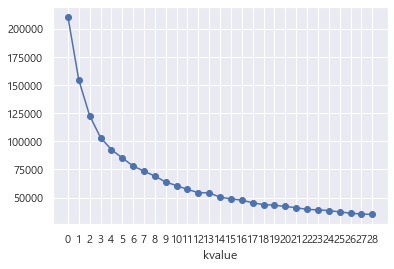

In [23]:
# TIPI 성향을 군집화
# KMeans 군집화를 위해 엘보그래프
from sklearn.cluster import KMeans
data1 = tpdata.iloc[:,-5:].copy()
dist =[]
for i in range(1,30):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 300)
    km.fit(data1)
    dist.append(km.inertia_)
plt.plot(range(len(dist)),dist,marker = 'o')
ticks = plt.xticks(range(len(dist)))
plt.xlabel('kvalue')
plt.show()

In [24]:
# K = 20 으로 선정
data2 = tpdata.iloc[:,-5:].copy()
knn = KMeans(n_clusters =20)
knn.fit(data2)
y_km= knn.predict(data2)
data['k'] = y_km

In [25]:
# 군집화한 k 기준 마키이벨리 스코어 평균
data[['MachScore','k']].groupby(['k']).mean()

,MachScore
k,
0,4.042274
1,3.182528
2,3.153894
3,3.449628
4,3.222301
5,4.112871
6,3.315142
7,3.091349
8,3.271640


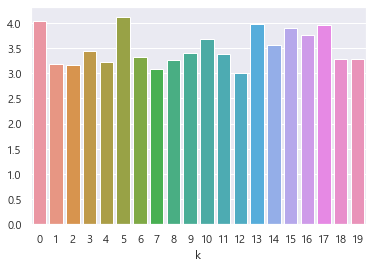

In [26]:
mk = data[['MachScore','k']].groupby(['k'])['MachScore'].mean()
sns.barplot(x = mk.index,y= mk.values)

In [27]:
# 마키아벨리즘 스코어가 높은 그룹과 낮은 그룹 투표 확인!
# 마키아벨리즘 스코어 높은 군집 K = 0 11 13 17 반대로 낮은 애들 1,2,8,9

In [28]:
# 스코어 높은 애들
vk = pd.DataFrame([data.k[:45529],train.voted])
vk = vk.T
vk.groupby('k')['voted'].mean()[[0, 11, 13, 17]]

k
0     1.586538
11    1.581892
13    1.617566
17    1.688043
Name: voted, dtype: float64

In [29]:
# 스코어 낮은 애들 
vk.groupby('k')['voted'].mean()[[1,2,8,9]]

k
1    1.549573
2    1.509350
8    1.625119
9    1.640133
Name: voted, dtype: float64

In [30]:
## 높낮이는 보인다. 스코어 낮은 애들은 높은 애들보다 투표율이 높다.